In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp

In [95]:
data = pd.read_csv("pleiades-extended-dataset.csv")

In [96]:
print(data)

      object  ra_hrs  ra_min  ra_sec  dec_deg  dec_min  dec_sec      v      b  \
0   HD 23630       3      44      27       23       58        0   2.87   2.78   
1   HD 23850       3      46       9       23       55        0   3.64   3.56   
2   HD 23302       3      41      57       23       58        0   3.71   3.60   
3   HD 23408       3      42      51       24       14        0   3.88   3.81   
4   HD 23480       3      43      21       23       49        0   4.18   4.12   
..       ...     ...     ...     ...      ...      ...      ...    ...    ...   
75         u       3      41       5       24        5       17  12.51  13.32   
76         v       3      44      19       24       14       18  12.61  13.79   
77         x       3      43       8       25        0       51  14.36  15.37   
78         y       3      46      26       23       49       58  15.72  16.87   
79         z       3      44      39       24       34       52  16.42  17.02   

        u      notes  
0   

In [97]:
v = data.loc[:,"v"]
b = data.loc[:,"b"]
u = data.loc[:,"u"]

bv = b-v
print(bv)

0    -0.09
1    -0.08
2    -0.11
3    -0.07
4    -0.06
      ... 
75    0.81
76    1.18
77    1.01
78    1.15
79    0.60
Length: 80, dtype: float64


In [98]:
bvabsolute = np.array([-0.35, -0.31, -0.16, 0, 0.13, 0.27, 0.42, 0.58, 0.7, 0.89, 1.18, 1.45, 1.63, 1.8])
absolutemags = np.array([-5.8, -4.1, -1.1, -0.7, 2, 2.6, 3.4, 4.4, 5.1, 5.9, 7.3, 9.0, 11.8, 16])

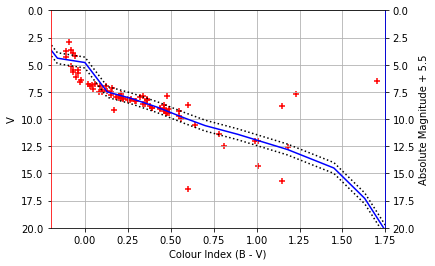

In [111]:
fig, ax = plt.subplots()

Doffset = 5.5
offsetuncertainty = 0.5
Doffset_plus_err = Doffset + offsetuncertainty
Doffset_less_err = Doffset - offsetuncertainty

ax.plot(bvabsolute, absolutemags + (Doffset_less_err), 'k:')
ax.plot(bvabsolute, absolutemags + (Doffset), 'b')
ax.plot(bvabsolute, absolutemags + (Doffset_plus_err), 'k:')

ax.scatter(bv, v, marker="+", color='red')

ax.set_xlim([-0.2, 1.75])
ax.set_ylim([20,0])
ax.set_xlabel("Colour Index (B - V)")
ax.set_ylabel("V")
ax.spines['left'].set_color("red")
ax.spines['right'].set_color("blue")

secax = ax.secondary_yaxis('right')
secax.set_ylabel('Absolute Magnitude + %.1f' %Doffset)
secax.set_ylim([6, 26])
secax.spines['left'].set_color("blue")

plt.grid()
plt.show()

In [121]:
def d(distanceoffset):
    return (10**(distanceoffset/5)) * 10

D= d(Doffset)

Dpluserr, Dminuserr = d(Doffset_plus_err), d(Doffset_less_err)

Derr1 = Dpluserr - D
Derr2 = D - Dminuserr
Derr = np.maximum(Derr1, Derr2)

print(D)
print(D + Derr, D - Derr)

125.89254117941675
158.48931924611134 93.29576311272217
